Exercises for chapter 1 in Data analysis recipes: Fitting a model to data by David W. Hogg

Exercise 1: Using the standard linear algebra method of this Section, fit the straight line $y = mx + b$ to the $x$, $y$, and $\sigma_y$ values for data points 5 through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for $\sigma_x$ and $\rho_{xy}$. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. What is the standard uncertainty variance $\sigma^2_m$ on the slope of the line?

In [39]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

DATA_DIR = Path("data")
TABLE1 = DATA_DIR / "table1.txt"

In [40]:
def f(x, m, b):
    return m * x + b

In [41]:
id, x, y, sigma_y, sigma_x, rho_xy = np.loadtxt(TABLE1, skiprows=1, unpack=True)

In [42]:
Y = y
A = np.vstack([np.ones_like(x), x]).T
C = np.diag(sigma_y ** 2)
Cinv = np.linalg.inv(C)
X = np.linalg.inv(A.T @ Cinv @ A) @ (A.T @ Cinv @ Y)
b, m = X

[ 47.          49.42424242  51.84848485  54.27272727  56.6969697
  59.12121212  61.54545455  63.96969697  66.39393939  68.81818182
  71.24242424  73.66666667  76.09090909  78.51515152  80.93939394
  83.36363636  85.78787879  88.21212121  90.63636364  93.06060606
  95.48484848  97.90909091 100.33333333 102.75757576 105.18181818
 107.60606061 110.03030303 112.45454545 114.87878788 117.3030303
 119.72727273 122.15151515 124.57575758 127.         129.42424242
 131.84848485 134.27272727 136.6969697  139.12121212 141.54545455
 143.96969697 146.39393939 148.81818182 151.24242424 153.66666667
 156.09090909 158.51515152 160.93939394 163.36363636 165.78787879
 168.21212121 170.63636364 173.06060606 175.48484848 177.90909091
 180.33333333 182.75757576 185.18181818 187.60606061 190.03030303
 192.45454545 194.87878788 197.3030303  199.72727273 202.15151515
 204.57575758 207.         209.42424242 211.84848485 214.27272727
 216.6969697  219.12121212 221.54545455 223.96969697 226.39393939
 228.8181818

(0.0, 700.0)

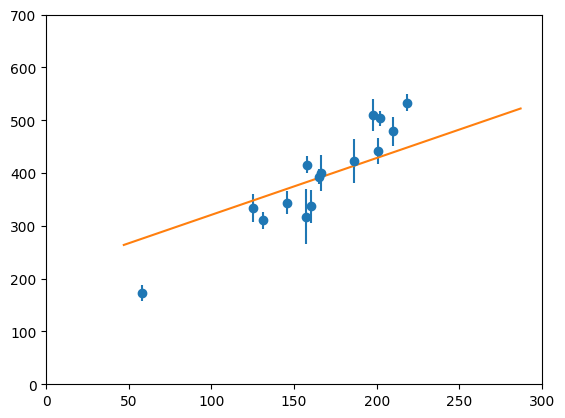

In [43]:
plt.errorbar(x, y, yerr=sigma_y, fmt="o")
x_new = np.linspace(x.min(), x.max(), 100)
print(x_new, m, b)
plt.plot(x_new, f(x_new, m, b))
plt.xlim(0, 300)
plt.ylim(0, 700)